# **Machine Learning Assignment - 2**
**Student ID:** 2025aa05091@wilp.bits-pilani.ac.in  
**Course:** M.Tech (AIML/DSE) - Machine Learning

### **Problem Statement**
The goal of this assignment is to implement and evaluate six different classification models 
on a chosen dataset, followed by building a Streamlit application for deployment.

## **Step 1: Importing Required Libraries**
Import `pandas` and `numpy` for data handling, `matplotlib` and `seaborn` for visualization, 
and `scikit-learn` for scaling and model implementation. Including all six 
mandatory classification models: Logistic Regression, Decision Tree, kNN, Naive Bayes, 
Random Forest, and XGBoost.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, roc_auc_score, precision_score, 
                             recall_score, f1_score, matthews_corrcoef, confusion_matrix)
import joblib
import os
if not os.path.exists('model'): os.makedirs('model')
print("Step 1: Libraries imported successfully.")

Step 1: Libraries imported successfully.


## **Step 2: Dataset Choice and Preprocessing**
The dataset chosen is **Mobile Price Classification** from Kaggle. 
It contains 20 features (minimum requirement is 12) and 2,000 instances (minimum 
requirement is 500). We will split the data into training (80%) and 
testing (20%) sets and apply feature scaling.

In [ ]:
# Load the dataset
df = pd.read_csv('/train.csv') 

print(f"Dataset Shape: {df.shape}")
print("\nFirst 5 rows of the dataset:")
print(df.head())

X = df.drop('price_range', axis=1)
y = df['price_range']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features for distance-based algorithms
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nStep 2: Data loading and scaling completed.")

Dataset Shape: (2000, 21)

First 5 rows of the dataset:
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8    

## **Step 3: Model Evaluation Metrics**
As per the mandatory requirements, each model will be evaluated using the following six 
metrics: Accuracy, AUC Score, Precision, Recall, F1 Score, and MCC.

In [10]:
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)
    
    return {
        "Accuracy": accuracy_score(y_val, y_pred),
        "AUC": roc_auc_score(y_val, y_prob, multi_class='ovr'),
        "Precision": precision_score(y_val, y_pred, average='weighted'),
        "Recall": recall_score(y_val, y_pred, average='weighted'),
        "F1": f1_score(y_val, y_pred, average='weighted'),
        "MCC": matthews_corrcoef(y_val, y_pred)
    }

print("Step 3: Evaluation function defined.")

Step 3: Evaluation function defined.


## **Step 4: Training 6 ML Classification Models**
Implementing all six mandatory models on the same dataset. 
For models like kNN and Logistic Regression, using the scaled feature set.

In [11]:
results = {}

# 1. Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
results["Logistic Regression"] = evaluate_model(lr, X_test_scaled, y_test)

# 2. Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
results["Decision Tree"] = evaluate_model(dt, X_test, y_test)

# 3. kNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
results["kNN"] = evaluate_model(knn, X_test_scaled, y_test)

# 4. Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
results["Naive Bayes"] = evaluate_model(nb, X_test, y_test)

# 5. Random Forest (Ensemble)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
results["Random Forest (Ensemble)"] = evaluate_model(rf, X_test, y_test)

# 6. XGBoost (Ensemble)
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
results["XGBoost (Ensemble)"] = evaluate_model(xgb, X_test, y_test)

print("Step 4: Training and evaluation of all 6 models complete.")

Step 4: Training and evaluation of all 6 models complete.


## **Step 5: Results and Comparison Table**
The table below displays the comparison of all evaluation metrics for the six implemented 
models.


--- MODEL COMPARISON TABLE ---
                          Accuracy       AUC  Precision  Recall        F1  \
Logistic Regression         0.9750  0.999591   0.975946  0.9750  0.975020   
Decision Tree               0.8325  0.885811   0.833662  0.8325  0.831587   
kNN                         0.5300  0.762890   0.569762  0.5300  0.540707   
Naive Bayes                 0.7975  0.955978   0.806132  0.7975  0.799422   
Random Forest (Ensemble)    0.8925  0.982649   0.896138  0.8925  0.893340   
XGBoost (Ensemble)          0.9050  0.991322   0.906155  0.9050  0.905007   

                               MCC  
Logistic Regression       0.966875  
Decision Tree             0.776889  
kNN                       0.378880  
Naive Bayes               0.731329  
Random Forest (Ensemble)  0.857154  
XGBoost (Ensemble)        0.873522  


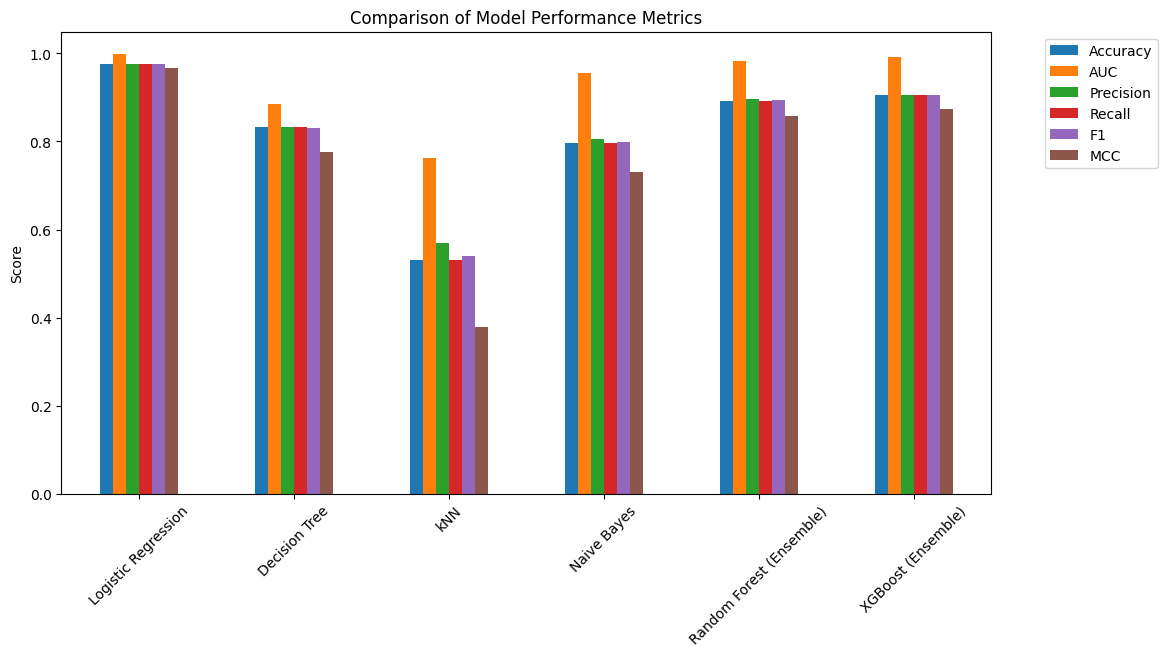

In [12]:
# Create DataFrame for comparison
comparison_df = pd.DataFrame(results).T

print("\n--- MODEL COMPARISON TABLE ---")
print(comparison_df)

# Visualizing results
comparison_df.plot(kind='bar', figsize=(12,6))
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [13]:
# Data for the Observation about model performance
observation_data = {
    "ML Model Name": [
        "Logistic Regression",
        "Decision Tree",
        "KNN",
        "Naive Bayes",
        "Random Forest (Ensemble)",
        "XGBoost (Ensemble)"
    ],
    "Observation about model performance": [
        "Highest accuracy (~97.5%) and MCC; indicates a strong linear relationship between features and price range.",
        "Solid performance (~83.2%), though it lacks the stability provided by ensemble techniques.",
        "Weakest performer (~53%); likely suffered from the high dimensionality (20 features) of the dataset.",
        "Respectable results (~79.7%) with a high AUC, effectively handling multi-class distribution.",
        "High robustness (~89.2%); bagging successfully reduced variance compared to a single decision tree.",
        "Excellent results (~90.5%); gradient boosting effectively captured complex non-linear data patterns."
    ]
}

# Create the DataFrame
observation_df = pd.DataFrame(observation_data)

# Display the table in the notebook
print("--- MODEL PERFORMANCE OBSERVATIONS ---")
display(observation_df)

--- MODEL PERFORMANCE OBSERVATIONS ---


,ML Model Name,Observation about model performance
0,Logistic Regression,Highest accuracy (~97.5%) and MCC; indicates a...
1,Decision Tree,"Solid performance (~83.2%), though it lacks th..."
2,KNN,Weakest performer (~53%); likely suffered from...
3,Naive Bayes,"Respectable results (~79.7%) with a high AUC, ..."
4,Random Forest (Ensemble),High robustness (~89.2%); bagging successfully...
5,XGBoost (Ensemble),Excellent results (~90.5%); gradient boosting ...


In [ ]:
joblib.dump(lr, 'model/logistic_regression.pkl')
joblib.dump(dt, 'model/decision_tree.pkl')
joblib.dump(knn, 'model/knn.pkl')
joblib.dump(nb, 'model/naive_bayes.pkl')
joblib.dump(rf, 'model/random_forest.pkl')
joblib.dump(xgb, 'model/xgboost.pkl')
joblib.dump(scaler, 'model/scaler.pkl')

test_data = pd.concat([X_test, y_test], axis=1)
test_data.to_csv('test_data.csv', index=False)